In [4]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import NanoImagingPack as nip
import tifffile as tif
import model as mus
import scipy
from fit3Dsphere import *

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(9, 6))
mpl.rc('image', cmap='gray')
#plt.switch_backend('agg')

# Start the viewer 
import napari
viewer = napari.Viewer()

# Installation
Install the following libraries:

```bash
pip install https://gitlab.com/bionanoimaging/nanoimagingpack.git
pip install tifffile numpy cv2 scipy matplotlib napari
```

# Define the model parameters


In [3]:
''' Define parameters '''
is_padding = False # better don't do it, some normalization is probably incorrect
is_display = True
is_optimization = False 
is_optimization_psf = False
is_flip = False
is_measurement = False

'''Choose between Born (BORN) or BPM (BPM)'''
#psf_model =  'BORN' # MultiSlice
psf_model =  'BPM' # 1st Born

Nx=100
Ny=100
Nz=100
lambda0=405e-9
nEmbb=1.33
dn_glass=.2
dn_plankton=.05
dn=0.1
NAo=.5
NAc=.003


dxy=lambda0/NAo/4
dz=dxy*2

# Define the object

/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_27405/3948324892.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


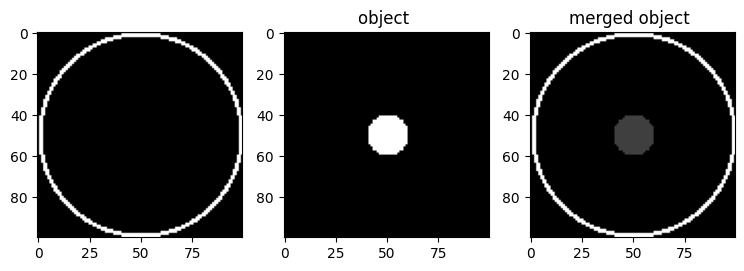

In [15]:
# create capillary
r_capillary=50
obj_capillary =  (1*(nip.rr((Nz,Nx))<r_capillary)-1*(nip.rr((Nz,Nx))<r_capillary-2))*dn_glass+nEmbb
obj_capillary = np.transpose(np.repeat(np.expand_dims(obj_capillary,0),Ny,0),[1,2,0])

# show center of volume
plt.title("Capillary")
plt.subplot(131)
plt.imshow(obj_capillary[:,:,Nz//2])

# create sample 
obj_plankton = dn_plankton*(nip.rr((Nx,Ny,Nz))<10)+nEmbb

plt.subplot(132)
plt.title("object ")
plt.imshow(obj_plankton[:,:,Nz//2])

# merge the two
obj = obj_capillary + obj_plankton

plt.subplot(133)
plt.title("merged object ")
plt.imshow(obj[:,:,Nz//2])
plt.show()


plt.show()

    

# Reserve Memory for all the angles

In [8]:
# rotate only the computed that has been computed once
allIntensityImages=[]
allSamples=[]

# sample acquisition parameters
dAngle = 360
Nrot = 4
    
allImages = np.zeros((Nx,Ny,Nz))+0j
allImagesRecon = np.zeros((Nx,Ny,Nz))+0j


# Iterate over all angles

Computing angle: 0.0
----------> Be aware: We are taking aberrations into account!
Number of Illumination Angles / Plane waves: 1


/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_27405/2624513696.py:22: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  obj_rot = scipy.ndimage.interpolation.rotate(obj.copy(), rot_angle, mode='nearest', axes=(0, 1), reshape=False)


--------> ATTENTION: I added no pi factor - is this correct?!
Buildup Q-PHASE Model 
BPM Normalization accounts for ENERGY conservation!!
[-2, -1]
[-2, -1]
[-2, -1]
[-2, -1]


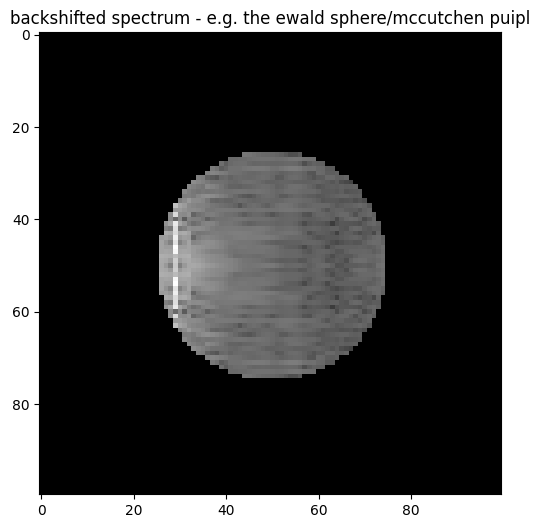

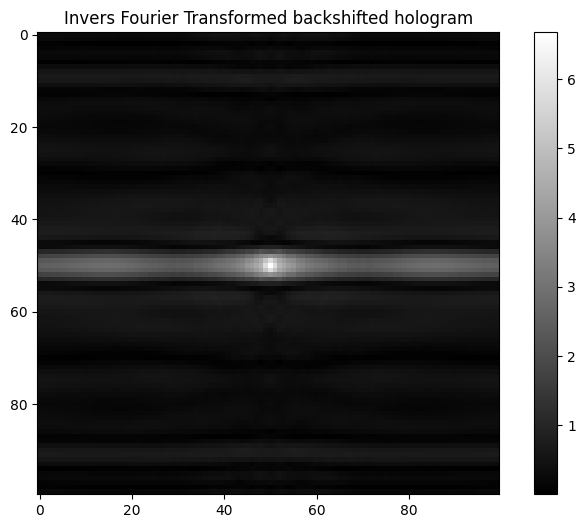

/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_27405/2624513696.py:85: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  allImagesRecon += scipy.ndimage.interpolation.rotate(my3dfield_rot, -rot_angle, mode='nearest', axes=(0, 1), reshape=False)


Computing angle: 90.0
----------> Be aware: We are taking aberrations into account!
Number of Illumination Angles / Plane waves: 1
--------> ATTENTION: I added no pi factor - is this correct?!
Buildup Q-PHASE Model 


/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_27405/2624513696.py:22: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  obj_rot = scipy.ndimage.interpolation.rotate(obj.copy(), rot_angle, mode='nearest', axes=(0, 1), reshape=False)


BPM Normalization accounts for ENERGY conservation!!
[-2, -1]
[-2, -1]
[-2, -1]
[-2, -1]


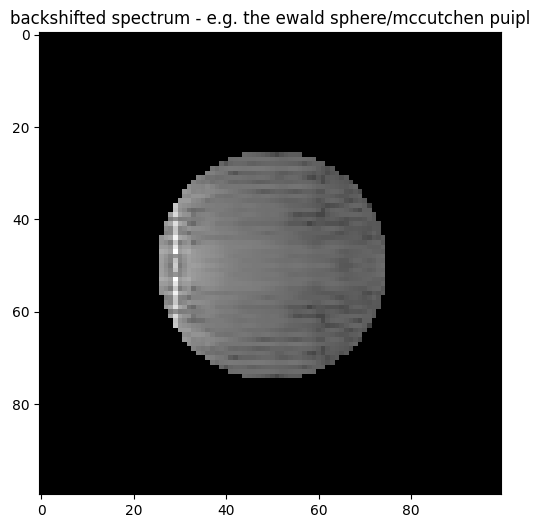

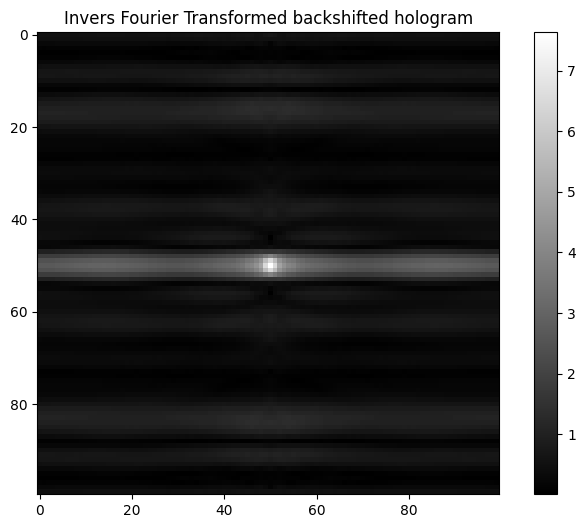

/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_27405/2624513696.py:85: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  allImagesRecon += scipy.ndimage.interpolation.rotate(my3dfield_rot, -rot_angle, mode='nearest', axes=(0, 1), reshape=False)


Computing angle: 180.0
----------> Be aware: We are taking aberrations into account!
Number of Illumination Angles / Plane waves: 1
--------> ATTENTION: I added no pi factor - is this correct?!
Buildup Q-PHASE Model 


/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_27405/2624513696.py:22: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  obj_rot = scipy.ndimage.interpolation.rotate(obj.copy(), rot_angle, mode='nearest', axes=(0, 1), reshape=False)


BPM Normalization accounts for ENERGY conservation!!
[-2, -1]
[-2, -1]
[-2, -1]
[-2, -1]


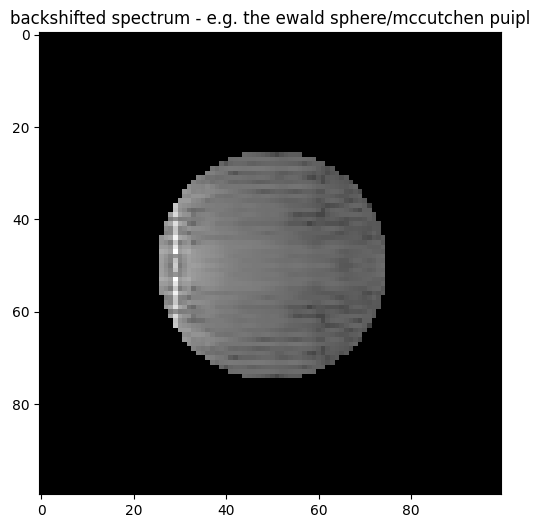

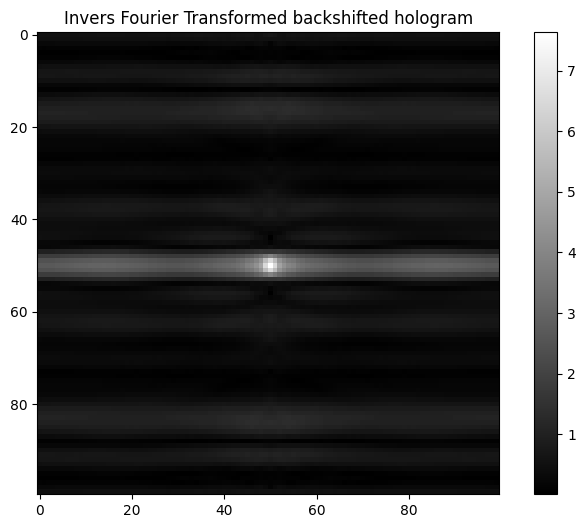

/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_27405/2624513696.py:85: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  allImagesRecon += scipy.ndimage.interpolation.rotate(my3dfield_rot, -rot_angle, mode='nearest', axes=(0, 1), reshape=False)


Computing angle: 270.0
----------> Be aware: We are taking aberrations into account!
Number of Illumination Angles / Plane waves: 1


/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_27405/2624513696.py:22: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  obj_rot = scipy.ndimage.interpolation.rotate(obj.copy(), rot_angle, mode='nearest', axes=(0, 1), reshape=False)


--------> ATTENTION: I added no pi factor - is this correct?!
Buildup Q-PHASE Model 
BPM Normalization accounts for ENERGY conservation!!
[-2, -1]
[-2, -1]
[-2, -1]
[-2, -1]


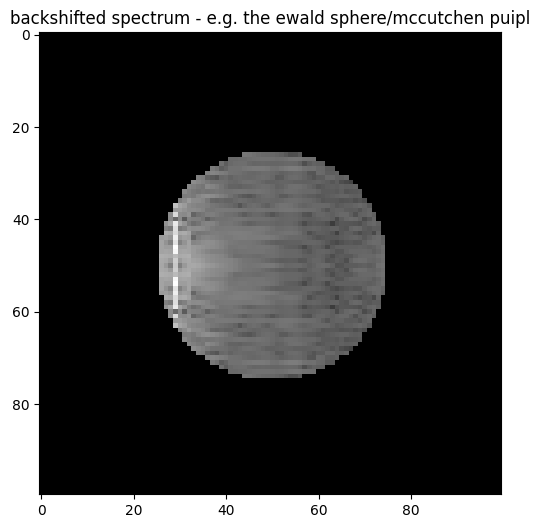

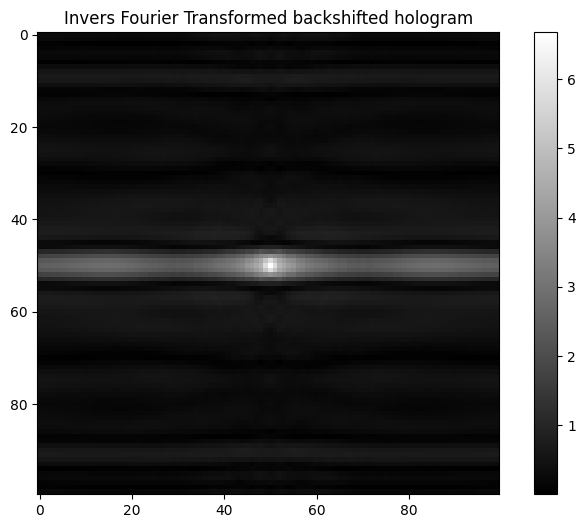

/var/folders/4w/k4yhf14j7xsbp2jd85yk555r0000gn/T/ipykernel_27405/2624513696.py:85: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  allImagesRecon += scipy.ndimage.interpolation.rotate(my3dfield_rot, -rot_angle, mode='nearest', axes=(0, 1), reshape=False)


In [16]:
# iterate over n angles 
for iangle in range(Nrot):
    
    # ...at resolution dAngle
    rot_angle=iangle/Nrot*dAngle
    print("Computing angle: "+str(rot_angle))

    
        
    # let the sample "flow" along the fluidics direction?
    if 0:            
        shift_x = Nx//2
        shift_y = Ny//2+(iangle-Nrot//2)
        shift_z = Nz//2
        obj=np.roll(obj,int(shift_x-(Nx*scalefctor)//2),1)
        obj=np.roll(obj,int(shift_y-(Nx*scalefctor)//2),2)
        obj=np.roll(obj,int(shift_z-(Nx*scalefctor)//2),0)
        #obj_real[obj>0]=dn_plankton+nEmbb
        
    
    # rotate sample - not the nicest; should be done in Fourier space?
    obj_rot = scipy.ndimage.interpolation.rotate(obj.copy(), rot_angle, mode='nearest', axes=(0, 1), reshape=False)
    allSamples.append(obj_rot)
    
    # initiliaze the Muscat model => Muscat means MultiScattering
    # It computes the pixel grid, the PSF, the sample, the illumination, the detection, the propagation, the refocusing
    # In the end we have a pupil function (most likely a circle, perhaps with aberattions) in normaalized pupil coordinates (r=1)
    # We compute the illumination angle to result from the position in the condenser's back focal plane 
    # This could also process microscopy systems wiith partial coherence, but we don't do this here
    # it sums coherent systems 
    # The way multiple scattering is done is by propagating the field through the sample, then refocusing it to the camera plane
    # The propagator is the beam propagation method (BPM) using the Fresnel approximation
    # The refocusing is done by a Fourier transform (e.g. backpropagation to the stack). 
    muscat = mus.MuScatModel(size=(Nz,Nx,Ny), dxy=dxy, dz=dz, lambda0=lambda0, 
                             nEmbb=nEmbb, dn=dn, NAo=NAo, NAc=NAc)
    
    # simulate the acquisition process (multiple scatterin through sample, then refocus to cameraplane)
    muscat.computesys(obj=obj_rot, is_tomo = False, is_compute_psf=psf_model, is_mictype='AIP')

    # Create Model Instance
    my3dfield_rot = muscat.computemodel(is_allslices=True)
    
    # compute 2d image as the center slice of the backpropagated volume (i.e. what would our microscope objective lens see?)
    bfImage = nip.abssqr(my3dfield_rot[muscat.size[0]//2,])
    
    # subtract background - not sure why I did that..
    dGauss = 10
    aipImage = (bfImage-nip.gaussf(bfImage,dGauss))/nip.gaussf(bfImage,dGauss)
    
    plt.imshow(np.abs(nip.ft(aipImage))**.15)

    #%% Shift spectrum back to center - hacky since it's not really computing the real center position
    reconResult = np.abs(np.roll(nip.ft(aipImage), -(muscat.size[1]//4-4))*np.squeeze(muscat.Po))
    plt.title("backshifted spectrum - e.g. the ewald sphere/mccutchen puipl")
    plt.imshow(np.abs(reconResult)**.15), plt.show()
    
    plt.title("Invers Fourier Transformed backshifted hologram")
    plt.imshow(np.abs(nip.ift(reconResult))), plt.colorbar()   , plt.show()            

    #%% visualize the stack in napar
    viewer.add_image(np.abs(my3dfield_rot))

    # delete muscat to free some memory
    del muscat

    if 0:
        plt.subplot(231),plt.imshow(np.abs(np.squeeze(np.array(muscat.allslices))[:,:,Ny//2])), plt.colorbar()
        plt.subplot(232),plt.imshow(np.angle(np.squeeze(np.array(muscat.allslices))[:,:,Ny//2])), plt.colorbar()
        plt.subplot(233),plt.imshow(np.squeeze(np.abs(obj[:,:,Ny//2]))), plt.colorbar()
        plt.subplot(236),plt.imshow(np.squeeze(np.mean(np.abs(obj),0))), plt.colorbar()

        plt.subplot(234),plt.imshow(np.squeeze(np.abs(my3dfield[:,:,Ny//2]))), plt.colorbar()
        plt.subplot(235),plt.imshow(np.squeeze(np.abs(my3dfield[Nz//2,:,:]))), plt.colorbar(), plt.show()
        plt.subplot(236),plt.imshow(np.squeeze(np.mean(np.abs(obj),0))), plt.colorbar()

    
    # collect image from center focus slice (assuming middle section represents focus)
    allIntensityImages.append(bfImage)
    
    # backrotate sample according to sample rotation angle
    allImages+=my3dfield_rot# scipy.ndimage.interpolation.rotate(my3dfield_rot, -rot_angle, mode='nearest', axes=(0, 1), reshape=False)


    # "reconstruct" the data or place them in FT space => backrotate
    allImagesRecon += scipy.ndimage.interpolation.rotate(my3dfield_rot, -rot_angle, mode='nearest', axes=(0, 1), reshape=False)
    
